$\textbf{Ejercicio 5.4}$ $\textbf{El límite de difracción de un Telescopio}$ 

Nuestra capacidad para resolver detalles en observaciones astrónomicas está limitada por la difracción de la luz en nuestros Telescopios. La luz se las estrellas puede tratarse efectivamente como si viniera de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda $\lambda$; atraviesa la abertura circular de un Telescopio (que asumiremos que tiene un radio unitario) y es enfocado por el Telesopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consiste en una mancha central rodeada por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por:

\begin{equation}
I(r)=\left(\frac{J_{1}(kr)}{kr}\right)^{2}
\end{equation}

Dónde $\textbf{r}$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ , $J_{1}(x)$ es la función de Bessel $J_{m}(x)$ esta dad por:

\begin{equation}
J_{m}(x) =\frac{1}{\pi} \int_{0}^{\pi} cos(m\theta-x sin\theta) \cdot d\theta
\end{equation}

Dónde $\textbf{m}$ es un número entero no negativo y $\textbf{x}$ es mayor ó igual a cero. 

$\textbf{a.)}$ Escriba una función en Python $J(m,x)$ que calcule el valor de $J_{m}(x)$ usando la regla de Simpson con $N=1000$ puntos. Use su función en un programa para hacer un diagrama en un sólo gráfico de las funciones de Bessel $J_{0}$, $J_{1}$, $J_{2}$ como funciones de $\textbf{x}$ de $x=0$ a $x=20$. 

$\textbf{b.)}$ Hacer un segundo programa que haga un gráfico de desnsidad de la intensidad del patrón de difracción circular de una fuente de luz puntal con $\lambda=500$ $[nm]$; en una región cuadrada del palno focal, usando la formula dada anteriormente. Su imagen debe cumplir los valores de $\textbf{r}$ desde cero hasta aproximadamente $1$ $[\mu m]$

Solución $\textbf{a.)}$

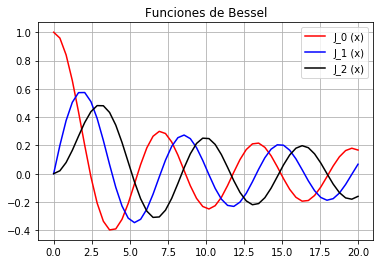

In [1]:
import numpy as np                       #Librerías
import matplotlib.pyplot as plt

N=1000
b=np.pi
a=0                  # Se define: el Número de Pasos, límites de la integral y Ancho rectangular del polígono (h)
h=(b-a)/N

def J(m,x):          # Definimos la funcíon que calcula el valor de Jm(x)
    
    def f(the):      # Definimos la funcíon a la cual se le calculará la integral
        return np.cos(m*the-x*np.sin(the))
    
    Fab=f(a)+f(b)    
    
    impar=0.0
    par=0.0
    
    for k in range(1,N,2):                 # Aplicamos el método de Simpson para calcular la integral de f(the)
        impar+=f(a+k*h)

    for k in range(2,N,2):
        par+=f(a+k*h)
        
    I=(1/np.pi)*(h/3)*(Fab+4*impar+2*par)
    
    return I                       

x=np.linspace(0,20)
plt.plot(x,J(0,x), 'r', label='J_0 (x)')
plt.plot(x,J(1,x), 'b', label='J_1 (x)')       # Realización de las respectivas gráficas 
plt.plot(x,J(2,x), 'k', label='J_2 (x)')
plt.title('Funciones de Bessel')
plt.legend()
plt.grid()

Solución $\textbf{b.)}$

Text(0.5, 1.0, 'Patrón de Difracción')

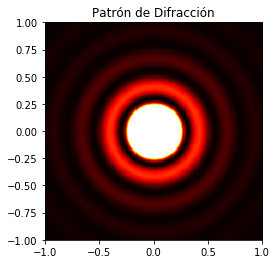

In [2]:
X=np.arange(-1,1, 0.01)      # Vector coordenado para el eje X 
Y=np.arange(-1,1, 0.01)      # Vector coordenado para el eje Y

XX, YY= np.meshgrid(X,Y)     # Creamos unalista de matrices de coordenadas a partir los vectores de coordenadas.

r = np.sqrt(XX**2 + YY**2)   # radio del patrón de difracción generado en el Telescopio 
L = 0.5                      # Longitud de onda en micrómetros que esquivalente a 500 [nm]
k = 2*np.pi/L                # Número de Onda

In = (J(1,k*r)/(k*r))**2     # Intensidad de la luz
plt.hot()
plt.imshow(In,vmax=0.01,extent=(-1,1,-1,1))     # Gráfica del patrón difracción 
plt.title('Patrón de Difracción')

Efectivamente se observa un patrón de difracción de anillos concentricos para la fuente de luz puntual cuya longitud de onda es $\lambda=500 [nm]$. Dicho patrón es el resultado de un fenómeno físico tridimensional proyectado en un plano, donde el color del diagrama esta relacionado con la profundidad del mísmo.